# Uczenie Maszynowe - Wykład 3

Na poprzednim wykładzie zapoznaliśmy się z podstawowym modelem regresji liniowej:

## Równanie linii regresji:

Regresja liniowa opisuje zależność między zmienną zależną (y) a zmienną niezależną (x) za pomocą równania:

$$
y = \beta_0 + \beta_1 x
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from sklearn.linear_model import LinearRegression

# Enable interactive mode
%matplotlib notebook

# Generating initial data
np.random.seed(0)
x_full = np.random.uniform(1, 10, 100)
y_full = 2.5 * x_full + np.random.normal(0, 2, 100)

# Linear regression model
def fit_regression(x, y):
    model = LinearRegression()
    x_reshaped = x.reshape(-1, 1)  # Reshaping for sklearn
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    return y_pred, model.coef_[0], model.intercept_

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.25)

# Plot the initial subset of points and regression line
line_data, = plt.plot(x_full, y_full, 'o', label='Data points')
y_pred, slope, intercept = fit_regression(x_full, y_full)
line_regression, = plt.plot(x_full, y_pred, label='Regression Line')

# Display the regression equation
text_eq = ax.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}', 
                  transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.title("Interactive Linear Regression")
plt.xlabel("x")
plt.ylabel("y")

# Add a slider for adjusting the number of data points
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor='lightgoldenrodyellow')
points_slider = Slider(ax_slider, 'Number of Points', 2, 100, valinit=2, valstep=1)

# Update function for the slider
def update(val):
    num_points = int(points_slider.val)
    x_subset = x_full[:num_points]
    y_subset = y_full[:num_points]
    
    # Update data points and regression line
    line_data.set_data(x_subset, y_subset)
    y_pred, slope, intercept = fit_regression(x_subset, y_subset)
    line_regression.set_data(x_subset, y_pred)
    
    # Update the displayed regression equation
    text_eq.set_text(f'y = {slope:.2f}x + {intercept:.2f}')
    
    ax.relim()
#     ax.autoscale_view()
    fig.canvas.draw_idle()

# Call the update function when the slider value changes
points_slider.on_changed(update)

# Display the plot
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


## Wartości odstające i ich wpływ na regresję

Wartości odstające to punkty danych, które znacząco odbiegają od ogólnego wzorca danych. W regresji mają szczególne znaczenie, ponieważ mogą zniekształcać linię najlepszego dopasowania, co może prowadzić do nieprecyzyjnych prognoz i błędnych interpretacji.

### Czym jest wartość odstająca?

Definicja: Wartość odstająca to obserwacja, która leży daleko poza typowym zakresem wartości w zestawie danych. Wyobraźmy sobie, że badamy dzienne temperatury, a większość dni mieści się w zakresie 15–25°C, ale pewnego dnia temperatura wzrasta do 40°C. Ta wartość 40°C jest wartością odstającą.

Dlaczego to ważne: W regresji wartości odstające mogą „przeciągnąć” linię regresji w ich kierunku, co zniekształca prognozy modelu. To może sprawić, że model będzie mniej skuteczny w przewidywaniu typowych punktów danych i bardziej podatny na losowy szum.

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a clear linear relationship
X = np.arange(1, 21).reshape(-1, 1)  # Feature (1, 2, 3, ..., 20)
y = 3 * X.squeeze() + np.random.normal(0, 2, X.shape[0])  # Linear relationship with some noise

# Fit a linear regression model to the data without outliers
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the data and the regression line (without outliers)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, y_pred, color='green', linewidth=2, label="Regression Line (No Outliers)")
plt.title("Linear Regression without Outliers")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# Now let's add an outlier and observe its impact
y_with_outlier = y.copy()
y_with_outlier[-1] += 30  # Add an extreme outlier to the last point

# Fit the model again, this time with the outlier
model_with_outlier = LinearRegression()
model_with_outlier.fit(X, y_with_outlier)
y_pred_with_outlier = model_with_outlier.predict(X)

# Plot the data with outlier and new regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y_with_outlier, color='blue', label="Data points with Outlier")
plt.plot(X, y_pred, color='green', linestyle='--', linewidth=2, label="Regression Line (No Outliers)")
plt.plot(X, y_pred_with_outlier, color='red', linewidth=2, label="Regression Line (With Outlier)")
plt.title("Impact of Outlier on Linear Regression")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Przykłady wartości odstających

### Zużycie energii podczas świąt:

Scenariusz: Zakłady energetyczne mogą używać regresji do przewidywania dziennego zużycia energii. Większość dni podąża za przewidywalnymi wzorcami, ale święta lub ekstremalne warunki pogodowe mogą powodować nagłe skoki.
Dane z rynku finansowego:

Przy przewidywaniu cen akcji nagłe wydarzenia na rynku, takie jak kryzysy gospodarcze lub skandale firmowe, mogą spowodować duże, nieoczekiwane wzrosty lub spadki cen.

### Czas rekonwalescencji pacjentów w opiece zdrowotnej:

Przy przewidywaniu czasu rekonwalescencji większość pacjentów może wracać do zdrowia w przewidywalnym przedziale czasowym, ale niektórzy mogą mieć niezwykle długie rekonwalescencje z powodu komplikacji.
Jak wartości odstające wpływają na linię regresji

W prostej regresji liniowej model stara się zminimalizować odległość (błąd) między przewidywaną linią a rzeczywistymi punktami danych. Wartości odstające zwiększają tę odległość, zmuszając linię do nachylenia lub przesunięcia w celu zminimalizowania błędu.

### Porozmawiajmy:

Wyobraź sobie, że próbujesz przewidzieć coś ważnego, na przykład zużycie energii w swoim mieście. Jeśli nagle wystąpi wyjątkowa fala upałów, czy uwzględniłbyś dane z tego dnia w swoim modelu? Jak mogłoby to wpłynąć na prognozy dla zwykłych dni? Jakie inne przypadki mogą powodować problemy z wartościami odstającymi w prognozach?

### Oto, jak wartości odstające zazwyczaj wpływają na linię regresji:

Efekt przyciągania: Wartość odstająca, zwłaszcza jeśli jest daleko od głównej grupy danych, może „przyciągnąć” linię w swoim kierunku, co skutkuje nachyloną linią, która nie reprezentuje dokładnie reszty danych.

Wzrost błędu: Metryka błędu modelu (np. średni błąd kwadratowy) rośnie z powodu wartości odstającej, co może sprawić, że model wydaje się mniej dokładny.

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a clear linear relationship
X = np.arange(1, 21).reshape(-1, 1)  # Feature (1, 2, 3, ..., 20)
y = 3 * X.squeeze() + np.random.normal(0, 2, X.shape[0])  # Linear relationship with noise

# Fit initial model without any outliers
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Function to plot with interactive outliers
def plot_with_outliers(num_outliers=1, outlier_intensity=20):
    # Copy the original y values
    y_with_outliers = y.copy()
    
    # Add outliers at random points
    outlier_indices = np.random.choice(range(len(X)), num_outliers, replace=False)
    for index in outlier_indices:
        y_with_outliers[index] += outlier_intensity  # Add intensity to create an outlier
    
    # Fit model with the new outliers
    model_with_outliers = LinearRegression()
    model_with_outliers.fit(X, y_with_outliers)
    y_pred_with_outliers = model_with_outliers.predict(X)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y_with_outliers, color='blue', label="Data points with Outliers")
    plt.plot(X, y_pred, color='green', linestyle='--', linewidth=2, label="Regression Line (No Outliers)")
    plt.plot(X, y_pred_with_outliers, color='red', linewidth=2, label="Regression Line (With Outliers)")
    plt.title(f"Impact of {num_outliers} Outlier(s) on Linear Regression")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.show()

# Interactive widgets for the number and intensity of outliers
num_outliers_slider = widgets.IntSlider(value=1, min=1, max=5, step=1, description="Number of Outliers")
outlier_intensity_slider = widgets.IntSlider(value=20, min=5, max=50, step=5, description="Outlier Intensity")

# Display interactive plot
widgets.interactive(plot_with_outliers, num_outliers=num_outliers_slider, outlier_intensity=outlier_intensity_slider)


interactive(children=(IntSlider(value=1, description='Number of Outliers', max=5, min=1), IntSlider(value=20, …

## Jak radzić sobie z wartościami odstającymi?

### Istnieją trzy podstawowe podejścia:

Usuń wartości odstające: W przypadkach, gdy wartości odstające wynikają z błędów w danych lub ekstremalnych wydarzeń, które raczej się nie powtórzą, ich usunięcie może poprawić dokładność modelu.

Użyj regresji odpornej: Niektóre modele, takie jak regresja odporna, są mniej wrażliwe na wartości odstające i minimalizują ich wpływ na linię najlepszego dopasowania.

Przekształć dane: Zastosowanie przekształceń (np. przekształcenie logarytmiczne) może pomóc zmniejszyć wpływ wartości odstających poprzez „skurczenie” dużych odchyleń.
Usuwanie wartości odstających?

Typową metodą radzenia sobie z wartościami odstającymi jest prosta filtracja oparta na rozkładzie danych. Pamiętasz rozkłady?

<img src='img/gauss.jpg'/>

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from scipy.stats import gaussian_kde
from IPython.display import display

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a linear trend and add some controlled outliers
X = np.arange(1, 31).reshape(-1, 1)  # Feature (1, 2, 3, ..., 30)
y = 2.5 * X.squeeze() + np.random.normal(0, 3, X.shape[0])  # Linear relationship with noise

# Introduce controlled outliers
y[7] += 25
y[14] -= 20
y[21] += 30

# Function to plot regression with quantile-based outlier filtering and KDE plot
def plot_filtered_regression(quantile_threshold=0.05):
    # Calculate quantile threshold limits for filtering
    lower_limit = np.quantile(y, quantile_threshold)
    upper_limit = np.quantile(y, 1 - quantile_threshold)
    
    # Filter data based on quantile threshold limits
    mask = (y >= lower_limit) & (y <= upper_limit)
    X_filtered = X[mask]
    y_filtered = y[mask]
    
    # Plot KDE and quantile threshold lines
    plt.figure(figsize=(10, 5))
    y_range = np.linspace(min(y) - 5, max(y) + 5, 1000)
    kde = gaussian_kde(y, bw_method='scott')
    kde_values = kde(y_range)
    plt.plot(y_range, kde_values, label="KDE of y", color="blue")
    plt.axvline(x=lower_limit, color="red", linestyle="--", label=f"Lower Threshold (Quantile {quantile_threshold})")
    plt.axvline(x=upper_limit, color="red", linestyle="--", label=f"Upper Threshold (Quantile {1 - quantile_threshold})")
    plt.xlabel("y (Target Values)")
    plt.ylabel("Density")
    plt.title("KDE Plot of y with Quantile Thresholds")
    plt.legend()
    plt.show()
    
    # Check if there are enough points left after filtering
    if len(X_filtered) > 1:
        # Fit regression models for comparison
        model_original = LinearRegression().fit(X, y)
        y_pred_original = model_original.predict(X)
        
        model_filtered = LinearRegression().fit(X_filtered, y_filtered)
        y_pred_filtered = model_filtered.predict(X_filtered)
        
        # Plot the original and filtered regression lines
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color="blue", label="Original Data with Outliers")
        plt.scatter(X_filtered, y_filtered, color="orange", label="Filtered Data (No Outliers)")
        plt.plot(X, y_pred_original, color="red", linestyle="--", linewidth=2, label="Regression Line (Original)")
        plt.plot(X_filtered, y_pred_filtered, color="green", linewidth=2, label="Regression Line (Filtered)")
        plt.xlabel("Feature (X)")
        plt.ylabel("Target (y)")
        plt.title("Outlier Removal using Quantile-based Filtering")
        plt.legend()
        plt.show()
    else:
        # Message if no data points are left after filtering
        print("No data points left after filtering. Adjust the threshold.")

# Interactive widget for setting quantile threshold
quantile_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description="Quantile Threshold")

# Display the interactive plot
display(widgets.interactive(plot_filtered_regression, quantile_threshold=quantile_slider))


interactive(children=(FloatSlider(value=0.05, description='Quantile Threshold', max=0.2, min=0.01, step=0.01),…

### Wykorzystanie odpornej metody regresji


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import ipywidgets as widgets
from IPython.display import display

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a clear linear trend and a few outliers
X = np.arange(1, 31).reshape(-1, 1)  # Feature (1, 2, 3, ..., 30)
y = 2.5 * X.squeeze() + np.random.normal(0, 3, X.shape[0])  # Linear relationship with noise

# Introduce controlled outliers
y[7] += 25
y[1] -= 25
y[14] -= 30
y[21] += 50
y[24] += 50

# Dictionary of available regression models with regularization
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression (L2)": Ridge(alpha=14.0),
    "Lasso Regression (L1)": Lasso(alpha=14.0),
    "Elastic Net": ElasticNet(alpha=14.0, l1_ratio=0.5)
}

# Function to fit and visualize different regularization models
def plot_regularization(model_name="Linear Regression"):
    # Get the selected model from the dictionary
    model = models[model_name]
    
    # Fit the model to the data
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Fit the standard Linear Regression model for comparison
    linear_model = LinearRegression().fit(X, y)
    y_pred_linear = linear_model.predict(X)
    
    # Plotting the data and the regression lines
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, color="blue", label="Original Data with Outliers")
    plt.plot(X, y_pred_linear, color="red", linestyle="--", linewidth=2, label="Standard Linear Regression")
    plt.plot(X, y_pred, color="green", linewidth=2, label=f"{model_name}")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title(f"Comparison of {model_name} with Standard Linear Regression")
    plt.legend()
    plt.show()

# Interactive widget for selecting regularization model
model_selector = widgets.Dropdown(
    options=["Linear Regression", "Ridge Regression (L2)", "Lasso Regression (L1)", "Elastic Net"],
    value="Linear Regression",
    description="Select Model:"
)

# Display the interactive plot
display(widgets.interactive(plot_regularization, model_name=model_selector))

interactive(children=(Dropdown(description='Select Model:', options=('Linear Regression', 'Ridge Regression (L…

W tradycyjnej regresji liniowej model minimalizuje sumę kwadratów reszt (różnice między wartościami przewidywanymi a rzeczywistymi). To podejście sprawdza się dobrze dla danych bez ekstremalnych wartości odstających, ale może łatwo ulec zniekształceniu przez kilka nietypowych punktów, które wywierają duży wpływ na prognozy modelu.

Niektóre metody zostały zaprojektowane, aby przezwyciężyć ten problem.

## Regularyzacja

Regularyzacja to technika stosowana w regresji w celu zwiększenia odporności modelu i zapobiegania nadmiernemu dopasowaniu. Chociaż nie jest skierowana bezpośrednio na wartości odstające, jest bardzo skuteczna, gdy mamy wiele cech lub gdy model jest nadmiernie dopasowany. Regularyzacja karze duże współczynniki modelu, efektywnie je „kurcząc” i tym samym zmniejszając wrażliwość modelu na pojedyncze punkty danych, w tym na wartości odstające.

Koncepcja regularyzacji okaże się przydatna, gdy zaczniemy pracować z


### Zaawansowany model regresji - regresja wielomianowa

Chociaż regresja liniowa jest prosta i skuteczna, dane rzeczywiste są często zbyt złożone, aby dopasować do nich prostą linię. Na szczęście istnieją bardziej zaawansowane modele regresji, które potrafią uchwycić złożone wzorce w danych. Modele te pozwalają uwzględniać nieliniowe zależności, interakcje między cechami, a nawet dostosowywać się do sytuacji, gdy dane zawierają wartości odstające.

Tutaj omówimy trzy przykłady bardziej zaawansowanych technik regresji, które wykraczają poza regresję liniową:

    Regresję wielomianową,
    Regresję drzew decyzyjnych,
    oraz regresję opartą na wektorach nośnych (SVR).

### Regresja wielomianowa

Co to jest: Regresja wielomianowa rozszerza regresję liniową poprzez dodanie kombinacji oryginalnych cech. Zamiast dopasowywać tylko linię, model może dopasować krzywą, dodając wyrazy podniesione do kwadratu (np. $X^2$) lub nawet wyższe potęgi.

Jak to działa: W regresji wielomianowej tworzymy nowe „cechy” poprzez podnoszenie wartości oryginalnych cech do wyższych potęg. Nowe cechy umożliwiają modelowi wyginanie się i dopasowanie do danych, które podążają za nieliniowym trendem.

Przykład: Wyobraźmy sobie przewidywanie wysokości rośliny w czasie. Początkowo wzrost może być powolny, następnie przyspieszać, a ostatecznie się wyrównać. Regresja liniowa może nie dopasować się dobrze do tych danych, ale regresja wielomianowa może stworzyć krzywą, która lepiej odpowiada wzorcowi wzrostu rośliny.

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data with a non-linear relationship
np.random.seed(42)
X = np.sort(np.random.rand(50, 1) * 1, axis=0)  # Feature values between 0 and 10
y = np.sin(5.3 * X.squeeze() + 1.95 * X.squeeze() ** 2) + np.random.normal(0, 0.04, X.shape[0])  # Quadratic relationship with noise


# Polynomial transformation
degree = 30 # Degree of the polynomial (e.g., quadratic)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit linear regression on the transformed polynomial features
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Visualize the polynomial regression fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, y_pred, color='red', linewidth=2, label=f"Polynomial Regression (Degree {degree})")
plt.title(f"Polynomial Regression Fit (Degree {degree})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()


Mean Squared Error (MSE): 0.001
R² Score: 0.998


<IPython.core.display.Javascript object>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def sumv2(y_true,y_pred):
    return round(np.sum((y_true - y_pred)**2),4)

def true(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(0)

degrees = [1, 5, 30]

X = np.linspace(0,1,30).reshape(-1,1)
y = true(X) + np.random.randn(30).reshape(-1,1) * 0.1


plt.figure(figsize=(10,5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    reg = LinearRegression()
    poly_features = poly.fit_transform(X)
    reg.fit(poly_features,y)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X, reg.predict(poly_features), label="Model", ls='--', c = 'r')
    plt.plot(X, true(X), label="True")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Suma błędów:"+str(sumv2(reg.predict(poly_features),y)))
plt.show()

<IPython.core.display.Javascript object>

## Przeuczenie i niedouczenie w regresji

### Niedouczenie

Niedouczenie występuje, gdy model jest zbyt prosty, aby uchwycić wzorce w danych. Zwykle ma to miejsce, gdy używamy modelu, który nie ma wystarczającej elastyczności lub złożoności, na przykład modelu liniowego dla danych z nieliniowym trendem.

### Przeuczenie

Przeuczenie występuje, gdy model jest zbyt złożony, co sprawia, że zamiast uchwycić tylko rzeczywiste wzorce w danych, model przechwytuje również szum. Często zdarza się to w przypadku modeli wielomianowych wysokiego stopnia lub bardzo elastycznych algorytmów stosowanych do ograniczonego zbioru danych.
Znalezienie właściwej równowagi

Celem jest znalezienie modelu, który jest wystarczająco złożony, aby uchwycić zależności w danych, ale nie na tyle złożony, aby był przeuczony.

*Czy macie pomysły, jak znaleźć odpowiedni model? Czy omawialiśmy już coś, co mogłoby pomóc w rozwiązaniu tego problemu?*

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

# Generate synthetic data with a non-linear relationship
np.random.seed(42)
X = np.sort(np.random.rand(30, 1) * 10, axis=0)  # Feature values between 0 and 10
y = 3 - 0.5 * X.squeeze() + 0.05 * X.squeeze() ** 2 + np.random.normal(0, 0.1, X.shape[0])  # Quadratic relationship with noise

# Generate test data to evaluate generalization
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_test = 3 - 0.5 * X_test.squeeze() + 0.05 * X_test.squeeze() ** 2  # True underlying function (without noise)

# Function to plot polynomial regression and visualize overfitting and underfitting
def plot_overfitting_underfitting(degree=1):
    # Polynomial transformation
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    X_test_poly = poly_features.transform(X_test)
    
    # Fit linear regression on the transformed polynomial features
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred_train = model.predict(X_poly)
    y_pred_test = model.predict(X_test_poly)
    
    # Calculate performance metrics
    train_mse = mean_squared_error(y, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Plotting the data and polynomial regression fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label="Training Data")
    plt.plot(X_test, y_test, color="black", linestyle="--", label="True Function")
    plt.plot(X_test, y_pred_test, color='red', linewidth=2, label=f"Polynomial Regression (Degree {degree})")
    plt.title(f"Polynomial Regression with Degree {degree}")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.show()
    
    # Display metrics
    print(f"Degree: {degree}")
    print(f"Training MSE: {train_mse:.3f}")
    print(f"Test MSE: {test_mse:.3f}")
    print(f"Training R² Score: {train_r2:.3f}")
    print(f"Test R² Score: {test_r2:.3f}")

# Interactive slider for adjusting polynomial degree
degree_slider = widgets.IntSlider(value=1, min=1, max=15, step=1, description="Degree")

# Display the interactive plot
display(widgets.interactive(plot_overfitting_underfitting, degree=degree_slider))


interactive(children=(IntSlider(value=1, description='Degree', max=15, min=1), Output()), _dom_classes=('widge…

Aby poradzić sobie z problemem niedouczenia i przeuczenia, można zastosować kilka technik:

### Regularyzacja

Co to jest: Regularyzacja dodaje karę dla dużych współczynników w modelu, co pomaga zmniejszyć złożoność modelu i uniknąć przeuczenia.
    
Techniki: Regresja Ridge Regression oraz regresja Lasso to przykłady modeli z regularyzacją, które mogą pomóc w kontrolowaniu złożoności modelu.

### Wybór odpowiedniego modelu

Co to oznacza: Wybór zbyt prostego modelu (jak regresja liniowa dla nieliniowych danych) może prowadzić do niedouczenia, a zbyt złożonego (jak regresja wielomianowa wysokiego stopnia) – do przeuczenia.
    
Jak wybrać: Testowanie różnych modeli i ocena ich wydajności za pomocą metryk, takich jak błąd średniokwadratowy (MSE) lub współczynnik determinacji R2R2, mogą pomóc znaleźć odpowiedni model dla danych.

### Zastosowanie sprawdzianu krzyżowego

Co to jest: Kroswalidacja pozwala na ocenę modelu na różnych podzbiorach danych, co daje bardziej wiarygodne wyniki niż pojedynczy podział na dane treningowe i testowe.
    
Zalety: Pomaga w ocenie stabilności modelu i może wskazać, czy model jest podatny na przeuczenie.

### Zwiększenie ilości danych

Dlaczego: Większa liczba danych może pomóc modelowi nauczyć się ogólnych wzorców i być mniej podatnym na przeuczenie.
    
Jak to zrobić: Można spróbować zebrać więcej danych, wzbogacić istniejące dane, lub zastosować techniki takie jak augmentacja danych w kontekście danych obrazowych.

### Transformacja cech

Dlaczego: Zastosowanie odpowiednich transformacji (np. logarytmicznych lub pierwiastkowych) może pomóc w lepszym dopasowaniu modelu do danych i zmniejszeniu wpływu wartości odstających.
    
Jak: Na przykład, zastosowanie logarytmów do wybranych cech w regresji wielomianowej może pomóc modelowi lepiej uchwycić nieliniowe zależności.

Stosowanie tych metod może pomóc w znalezieniu modelu, który dobrze dopasowuje się do danych, minimalizując jednocześnie ryzyko niedouczenia i przeuczenia.

### Sprawdzian krzyżowy

Sprawdzian krzyżowy (ang. cross-validation) to technika stosowana w uczeniu maszynowym, która pozwala na lepszą ocenę jakości modelu poprzez podział danych na wiele różnych zestawów:

    Uczący
    Walidacyjny
    Testowy
    
Dzięki temu możemy uzyskać bardziej wiarygodne wyniki niż w przypadku pojedynczego podziału danych na zbiór treningowy i testowy.

Zbiór uczący wykorzystywany jest podczas trenowania algorymtu, czyli podczas wpasowywania funkcji regresji

Zbiór walidacyjny jest wykorzystywany podczas testów algorytmu, czyli podczas oceny wstępnej naszego algorytmu

Zbiór testowy wykorzystywany jest tylko <b> raz </b> do ostatecznego testu i oceny naszego algorytmu

#### Jak działa sprawdzian krzyżowy?

Najpopularniejszą metodą jest k-krotny sprawdzian krzyżowy (k-fold cross-validation). W tej metodzie wykonuje się:

    Podział danych: Dane są dzielone na kk równych części, czyli „foldów” (zwykle wybiera się k=5 lub k=10).

    Trenowanie i testowanie: Model jest trenowany k razy, za każdym razem na innym podzbiorze danych. W każdej iteracji jedna z części jest używana jako zbiór testowy, a pozostałe $k−1$ części są używane do trenowania modelu.

    Średnia wyników: Po k iteracjach uzyskujemy k wyników, które następnie uśredniamy, aby uzyskać końcową miarę jakości modelu (np. średnią wartość błędu lub współczynnik determinacji $R^2$).

#### Dlaczego warto stosować sprawdzian krzyżowy?

Kroswalidacja jest przydatna, ponieważ:

    Zmniejsza ryzyko losowego błędu: Testowanie modelu na różnych podzbiorach danych pozwala uzyskać bardziej stabilne i reprezentatywne wyniki.
    
    Pomaga wykryć przeuczenie: Jeśli model dobrze działa na treningowych podzbiorach, ale źle na testowych, może to być oznaka przeuczenia.
    
    W pełni wykorzystuje dane: Każdy punkt danych jest wykorzystany zarówno w treningu, jak i w testowaniu, co jest szczególnie ważne, gdy mamy mały zestaw danych.
    
    
#### Przykład

Metody nadzorowane "uczą się" poznając swój błąd (zatem uczą się na błędach) - dzięki przykładom wiedzą jak bardzo się mylą i co należy zmienić. Można to przyrównać do nauki studenta:

    Student się uczy/studiuje robiąc zadania w domu. Po wykonaniu zadania sprawdza odpowiedź - jeśli się zgadza, wiedza jest utrwalana i student wie, że robi zadanie poprawnie. Jeśli nie, poprawia się.
    
    Student przychodzi na kolokwium. Tych pytań nigdy nie widział i nie zna odpowiedzi, przynajmniej nie od razu. Jeśli pójdzie mu dobrze, wie że jest na dobrej drodze. Jeśli nie - trzeba wrócić do domu i znów się uczyć.
    
    Na końcu student przychodzi na egzamin. Ma tylko jedną szansę. Jeśli go obleje - student jest do usunięcia.
    
<img src='img/TVT.png' img/>

In [9]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
cechy = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
cel = pd.DataFrame(diabetes['target'])

In [10]:
cechy

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cechy,cel,train_size=0.8)

In [12]:
x_train.shape

(353, 10)

In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
for x in kf.split(x_train):
    print(x)

(array([177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352]), array([  0,   1,   

In [14]:
kf = KFold(n_splits=2)
for x,y in kf.split(x_train):
    x_cv_train = x_train.iloc[x]
    x_cv_val = x_train.iloc[y]
    y_cv_train = y_train.iloc[x]
    y_cv_val = y_train.iloc[y]

Sprawdzian krzyżowy pozwala na wiarygodną eksperymentację z modelami bez wprowadzania obciążeń statystycznych.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_percentage_error
kf = KFold(n_splits=5)
stopien = 1
poly = PolynomialFeatures(degree = stopien, include_bias = True)
r2s = []
mapes = []
for x,y in kf.split(x_train.values):
    x_cv_train = x_train.iloc[x]
    x_cv_val = x_train.iloc[y]
    y_cv_train = y_train.iloc[x]
    y_cv_val = y_train.iloc[y]
    
    liniowa = LinearRegression()
    poly_features = poly.fit_transform(x_cv_train)
    liniowa.fit(poly_features,y_cv_train)
    
    poly_val = poly.transform(x_cv_val)
    y_est = liniowa.predict(poly_val)
    r2s.append(r2_score(y_cv_val,y_est))
    mapes.append(mean_absolute_percentage_error(y_cv_val,y_est))
print('R2:',np.mean(r2s))
print('MSE:',np.mean(mapes))  

R2: 0.4264109367791127
MSE: 0.3990651986859503


To samo możemy osiągnąć za pomocą funkcji <i>cross_validate</i>

In [16]:
from sklearn.model_selection import cross_validate
liniowa = LinearRegression()
poly = PolynomialFeatures(degree = 1, include_bias = True)
poly_features = poly.fit_transform(x_train)

cross_validate(liniowa, poly_features,y_train, cv = 5, scoring = 'r2', return_train_score = True)

{'fit_time': array([0.00607181, 0.00600147, 0.00506949, 0.00703025, 0.00644732]),
 'score_time': array([0.00493288, 0.00495172, 0.00548887, 0.00505781, 0.00334334]),
 'test_score': array([0.22810271, 0.38077928, 0.57293938, 0.427243  , 0.52299031]),
 'train_score': array([0.52790589, 0.51593303, 0.46079678, 0.49932072, 0.4762524 ])}

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from ipywidgets import interact

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X*2).ravel() + np.random.normal(0, 0.4, X.shape[0])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Function to fit polynomial regression and plot results
def plot_polynomial_regression(degree):
    # Set up polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Generate predictions
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    y_plot_pred = model.predict(X_plot_poly)
    
    # Calculate Mean Squared Errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    # Plot the results
    fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Training set plot
    ax_train.scatter(X_train, y_train, color='blue', label='Training Data')
    ax_train.plot(X_plot, y_plot_pred, color='red', label=f'Polynomial Degree {degree}')
    ax_train.set_title(f"Training Data Fit\nMean Squared Error: {train_mse:.2f}")
    ax_train.set_xlabel("X")
    ax_train.set_ylabel("y")
    ax_train.legend()
    
    # Validation set plot
    ax_val.scatter(X_val, y_val, color='green', label='Validation Data')
    ax_val.plot(X_plot, y_plot_pred, color='red', label=f'Polynomial Degree {degree}')
    ax_val.set_title(f"Validation Data Fit\nMean Squared Error: {val_mse:.2f}")
    ax_val.set_xlabel("X")
    ax_val.set_ylabel("y")
    ax_val.legend()
    
    plt.show()

# Interactive widget for polynomial degree
interact(plot_polynomial_regression, degree=widgets.IntSlider(min=1, max=30, step=1, value=2))


interactive(children=(IntSlider(value=2, description='degree', max=30, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_polynomial_regression(degree)>

## Krzywa uczenia i złożoności

### Krzywa złożoności 

Krzywa złożoności pozwala ocenić jaki wpływ na dokładność modelu mają jego hiperparametry

In [18]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

diabetes = datasets.load_diabetes()
cechy = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
cel = pd.DataFrame(diabetes['target'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cechy,cel,train_size=0.8)

ucz = []
val = []
for n in range(1,10):
    liniowa = LinearRegression()
    poly = PolynomialFeatures(degree = n, include_bias = True)
    poly_features = poly.fit_transform(x_train)
    scores = cross_validate(liniowa, poly_features,y_train, cv = 3, return_train_score=True)
    train_score = scores['train_score']
    val_score = scores['test_score']
    ucz.append(np.mean(train_score))
    val.append(np.mean(val_score))
plt.figure(figsize = (12,5))
plt.plot([x for x in range(1,10)],ucz, label = "TRAIN SCORE")
plt.plot([x for x in range(1,10)],val, label = "VALIDATION SCORE")
plt.ylabel("Współczynnik R2")
plt.xlabel("Współczynnik złożoności")
plt.legend()

<IPython.core.display.Javascript object>

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

ucz = []
val = []
for n in range(1,100):
    svr = SVR(kernel='rbf',C=n)
    scores = cross_validate(svr, x_train.values,y_train.values.reshape(-1), cv = 5, return_train_score=True)
    train_score = scores['train_score']
    val_score = scores['test_score']
    ucz.append(np.mean(train_score))
    val.append(np.mean(val_score))
plt.figure(figsize = (12,5))
plt.plot(np.arange(len(ucz)),ucz, label = "TRAIN SCORE")
plt.plot(np.arange(len(ucz)),val, label = "VALIDATION SCORE")
plt.ylim(0,1)
plt.legend()

### Krzywa uczenia

Wielkość zbioru uczącego jest niezwykle ważna podczas modelowania danych. Ile danych to wystarczająco dużo?

Możemy sprawdzić zachowanie algorytmu w zależności od liczby dostępnych przykładów. Nazywamy to <i> krzywą uczenia </i>

<IPython.core.display.Javascript object>


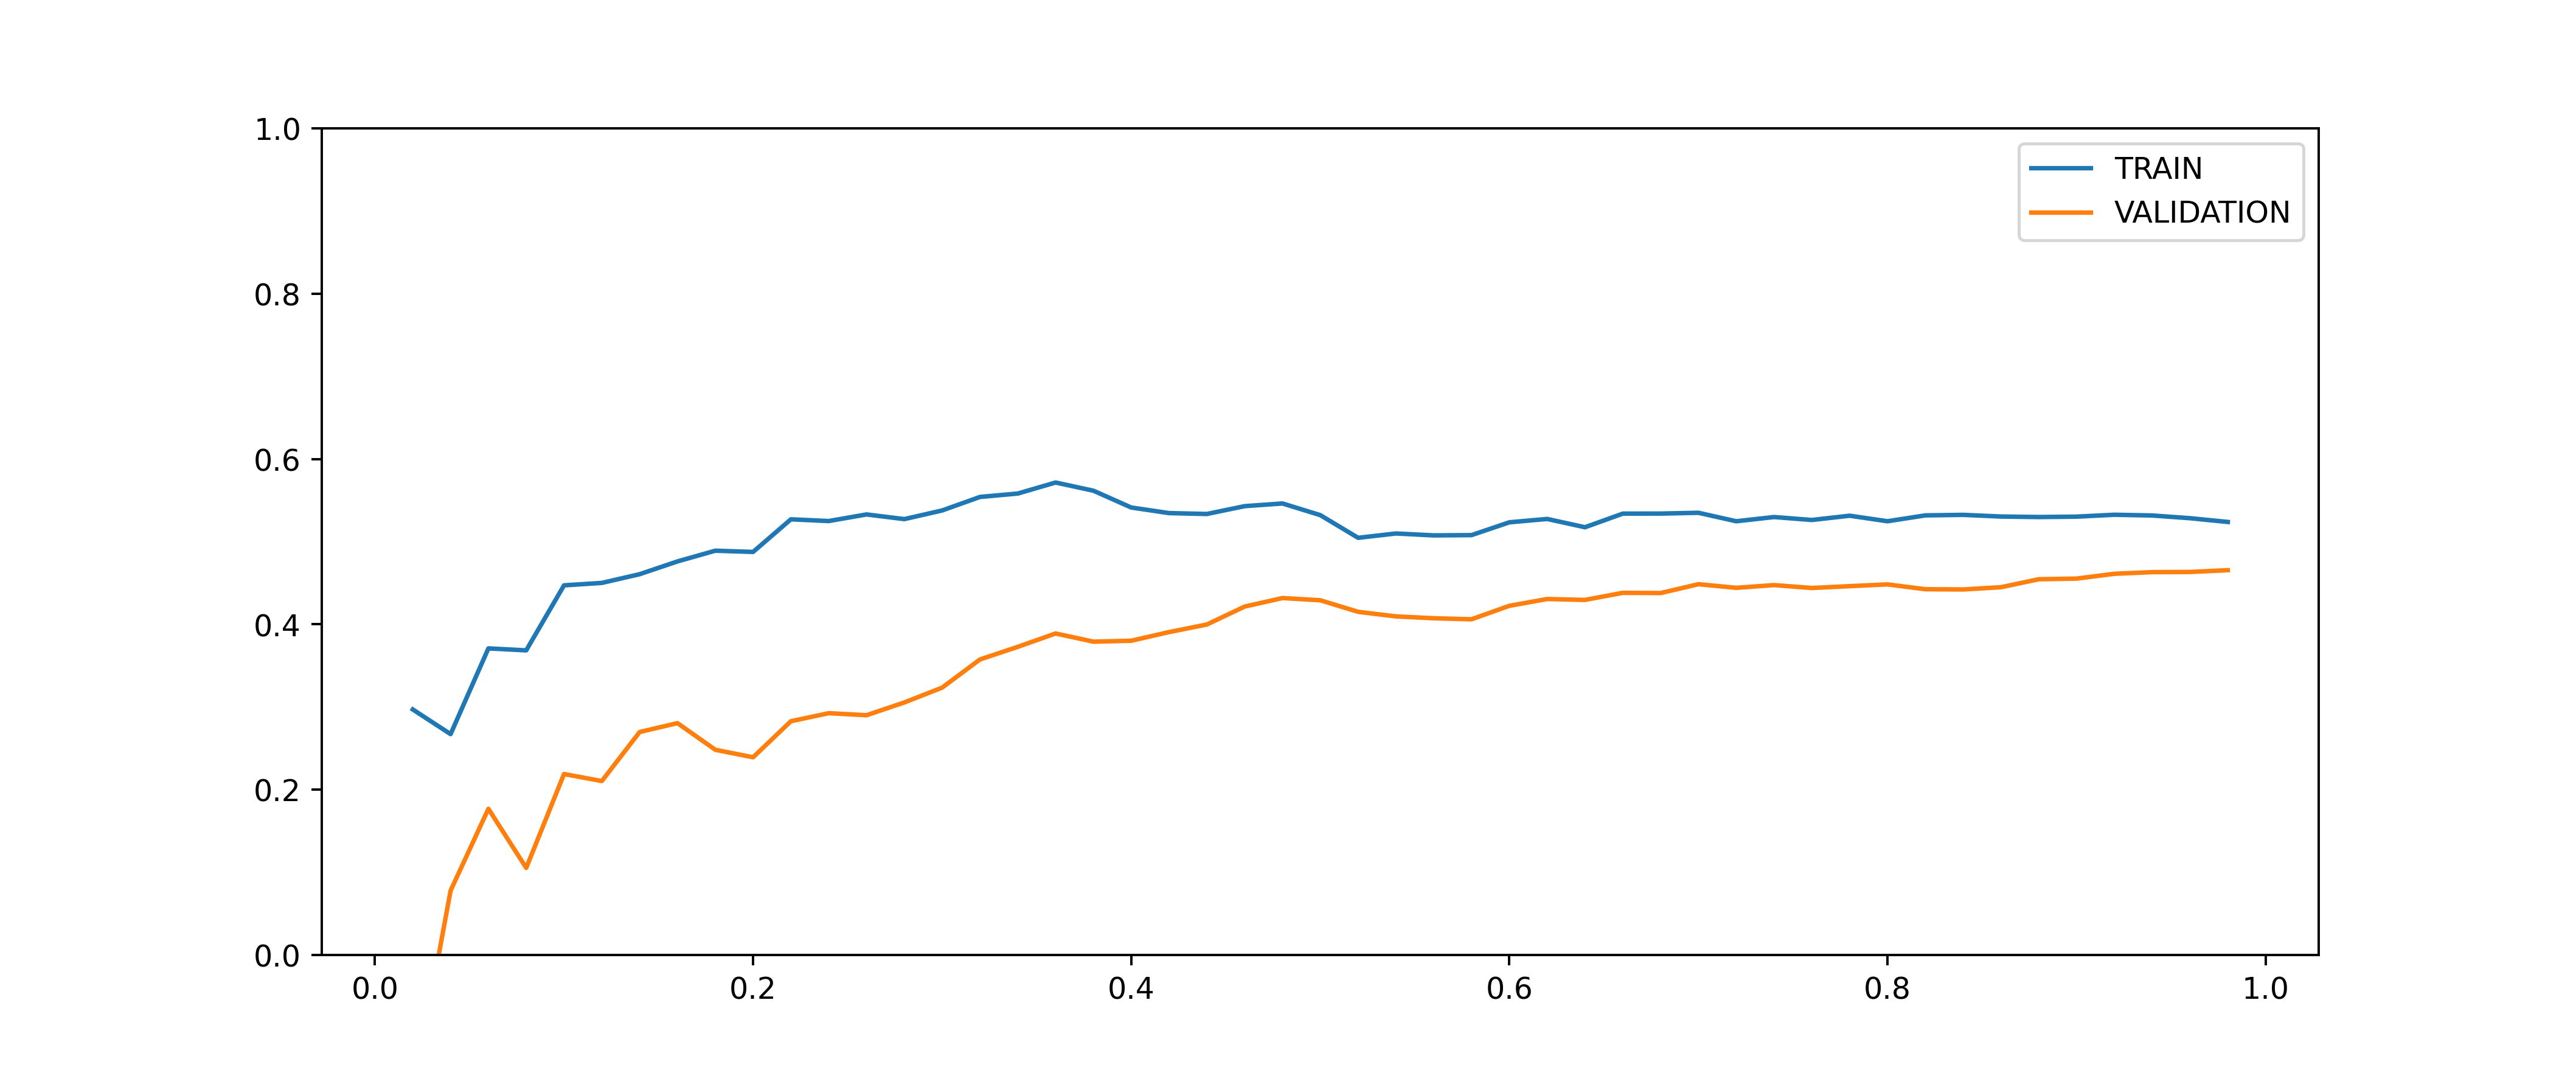

(0.0, 1.0)

In [30]:
split_size = [x/50 for x in range(50)][1:]

from sklearn.svm import SVR
from sklearn.model_selection import cross_validate, learning_curve
import matplotlib.pyplot as plt

svr = SVR(kernel='rbf',C=18,gamma=22)
lc = learning_curve(svr,x_train,y_train.values.reshape(-1),train_sizes=split_size,cv=5)
plt.figure(figsize = (12,5))
plt.plot(split_size,np.mean(lc[1],axis=1),label="TRAIN")
plt.plot(split_size,np.mean(lc[2],axis=1),label="VALIDATION")
plt.legend()
plt.ylim(0,1)

# Support Vector Regression (SVR)

Support Vector Regression (SVR) to algorytm oparty na zasadach Support Vector Machines (SVM), stosowany do regresji. Celem SVR jest znalezienie linii, krzywej lub powierzchni, która najlepiej odwzorowuje zależność między zmiennymi wejściowymi a wyjściową. Oto kluczowe aspekty działania SVR:

Wektory nośne (support vector) oznacza wykorzystanie punktów "najistotniejszych" do wpsowania modelu.

### Zasada Epsilon-Tube

SVR nie próbuje dokładnie dopasować modelu do każdego punktu danych. Zamiast tego, określa pewien margines błędu, zwany epsilon (ε), w którym model toleruje różnice między przewidywanymi a rzeczywistymi wartościami.

Jeśli punkt danych znajduje się w tym marginesie, jest traktowany jako "dobrze dopasowany" i nie wpływa na ostateczne rozwiązanie.
Punkty poza marginesem (leżące poza epsilon-tube) przyczyniają się do błędu i są karane w funkcji kosztu.

### Optymalizacja i marginesy

Celem SVR jest znalezienie takiej linii/krzywej/powierzchni, która:

Minimalizuje odchylenie od danych, jednocześnie dopuszczając tolerancję ε.
Maksymalizuje płaskość funkcji, co oznacza regularyzację.

Formuła optymalizacji w SVR uwzględnia dwa aspekty:

Minimalizację ∣∣w∣∣2 (ograniczanie modelu, aby był prosty).
Minimalizację błędów dla punktów poza epsilon-tube (punkty trudne do przewidzenia są karane proporcjonalnie do ich odległości od marginesu).

### Kara za odchylenia - parametr C

Parametr C kontroluje kompromis między dopasowaniem modelu a jego ogólną złożonością:

    Niskie C: Model jest bardziej elastyczny, dopuszcza większe błędy, co może skutkować niedopasowaniem (underfitting).
    Wysokie C: Model bardziej stara się dopasować do danych treningowych, co może prowadzić do przeuczenia (overfitting).

### Kernel i przestrzeń cech

SVR może pracować z danymi nieliniowymi dzięki tzw. trikom jądrowym (kernel tricks):

Kernel przekształca dane do wyższej przestrzeni wymiarów, gdzie można łatwiej znaleźć liniową hiperpowierzchnię (np. linię regresji).

Popularne kernele to:
        
        Linear (prosta regresja liniowa),
        Polynomial (model polinomiczny),
        RBF (nieliniowy model z funkcją radialną, dobry dla złożonych danych).

### Epsilon i funkcja kosztu

Parametr ε (epsilon) definiuje szerokość marginesu tolerancji:

    Mniejsze epsilon: Model stara się bardziej dopasować do danych, co może skutkować przeuczeniem.
    Większe epsilon: Model jest bardziej tolerancyjny na błędy i ignoruje drobne odchylenia.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from ipywidgets import interact

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = X.ravel() + 4 * (0.5 - np.random.rand(50))

# Function to plot SVR with interactive controls
def plot_svr(C=1.0, epsilon=0.1, kernel='rbf'):
    # Train SVR model
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X, y)
    
    # Generate predictions
    X_fit = np.linspace(0, 5, 500).reshape(-1, 1)
    y_fit = svr.predict(X_fit)
    
    # Plot data and SVR predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='red', label='Data points')
    plt.plot(X_fit, y_fit, color='blue', label='SVR prediction')
    plt.fill_between(
        X_fit.ravel(),
        y_fit - epsilon,
        y_fit + epsilon,
        color='blue',
        alpha=0.2,
        label=f"Epsilon-tube (ε={epsilon})"
    )
    plt.title(f"Support Vector Regression (Kernel: {kernel}, C={C}, ε={epsilon})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Create interactive widget
interact(
    plot_svr,
    C=(0.1, 100.0, 0.1),
    epsilon=(0.01, 1.0, 0.01),
    kernel=['linear', 'poly', 'rbf']
)


interactive(children=(FloatSlider(value=1.0, description='C', min=0.1), FloatSlider(value=0.1, description='ep…

<function __main__.plot_svr(C=1.0, epsilon=0.1, kernel='rbf')>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from ipywidgets import interact

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() + 0.3 * (0.5 - np.random.rand(50))

# Function to plot SVR with interactive controls
def plot_svr(C=1.0, epsilon=0.1, kernel='rbf'):
    # Train SVR model
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X, y)
    
    # Generate predictions
    X_fit = np.linspace(0, 5, 500).reshape(-1, 1)
    y_fit = svr.predict(X_fit)
    
    # Plot data and SVR predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='red', label='Data points')
    plt.plot(X_fit, y_fit, color='blue', label='SVR prediction')
    plt.fill_between(
        X_fit.ravel(),
        y_fit - epsilon,
        y_fit + epsilon,
        color='blue',
        alpha=0.2,
        label=f"Epsilon-tube (ε={epsilon})"
    )
    plt.title(f"Support Vector Regression (Kernel: {kernel}, C={C}, ε={epsilon})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Create interactive widget
interact(
    plot_svr,
    C=(0.1, 100.0, 0.1),
    epsilon=(0.01, 1.0, 0.01),
    kernel=['linear', 'poly', 'rbf']
)


interactive(children=(FloatSlider(value=1.0, description='C', min=0.1), FloatSlider(value=0.1, description='ep…

<function __main__.plot_svr(C=1.0, epsilon=0.1, kernel='rbf')>